# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


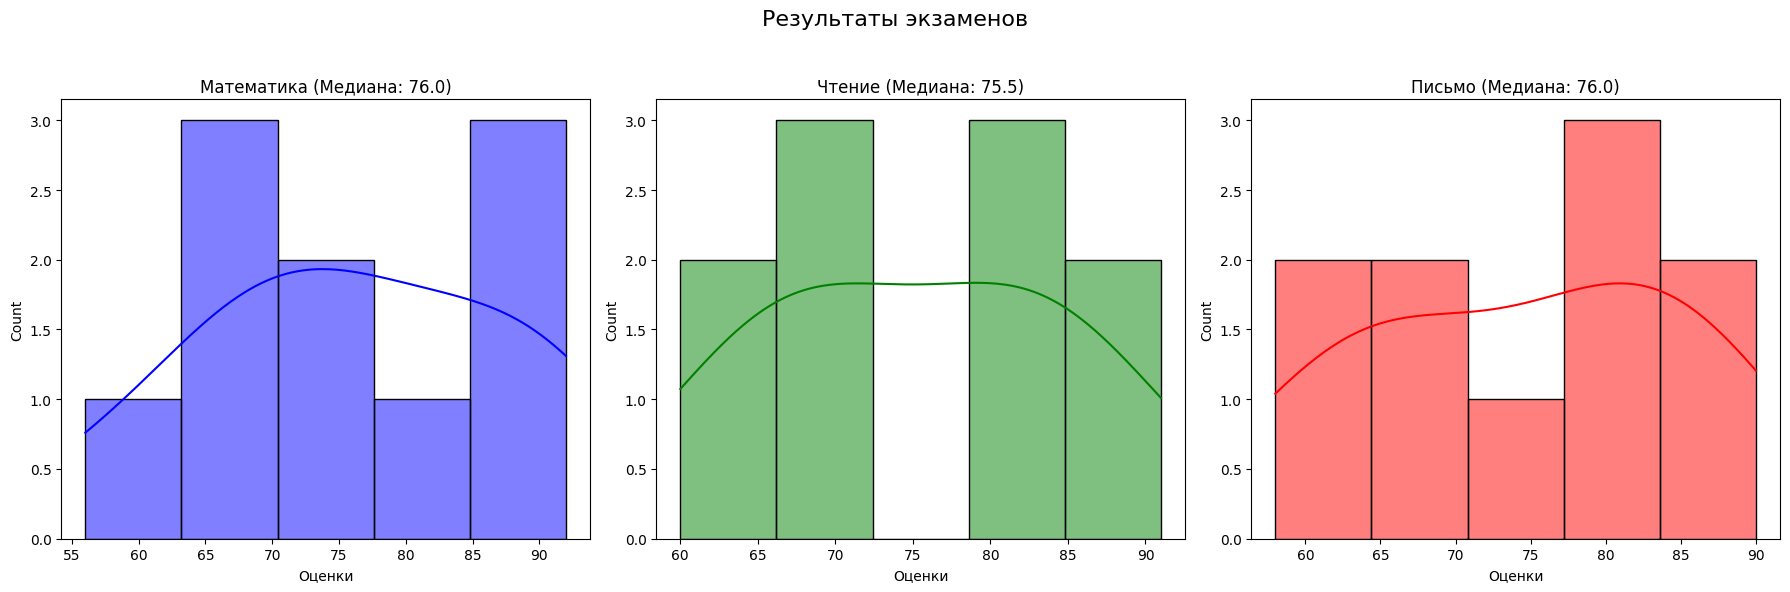

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'math_score': [67, 90, 56, 75, 88, 92, 70, 66, 81, 77],
    'reading_score': [70, 85, 60, 72, 84, 91, 67, 65, 80, 79],
    'writing_score': [68, 83, 58, 74, 86, 90, 65, 63, 82, 78]
}

df = pd.DataFrame(data)

median_math = df['math_score'].median()
median_reading = df['reading_score'].median()
median_writing = df['writing_score'].median()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Результаты экзаменов", fontsize=16)

sns.histplot(df['math_score'], kde=True, ax=axes[0], color='blue')
axes[0].set_title(f"Математика (Медиана: {median_math})")
axes[0].set_xlabel("Оценки")

sns.histplot(df['reading_score'], kde=True, ax=axes[1], color='green')
axes[1].set_title(f"Чтение (Медиана: {median_reading})")
axes[1].set_xlabel("Оценки")

sns.histplot(df['writing_score'], kde=True, ax=axes[2], color='red')
axes[2].set_title(f"Письмо (Медиана: {median_writing})")
axes[2].set_xlabel("Оценки")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


In [2]:
!ls data

StudentsPerformance.csv.zip  beauty.csv		young-people-survey.csv.gz
adult.csv.gz		     bikes_rent.csv.gz


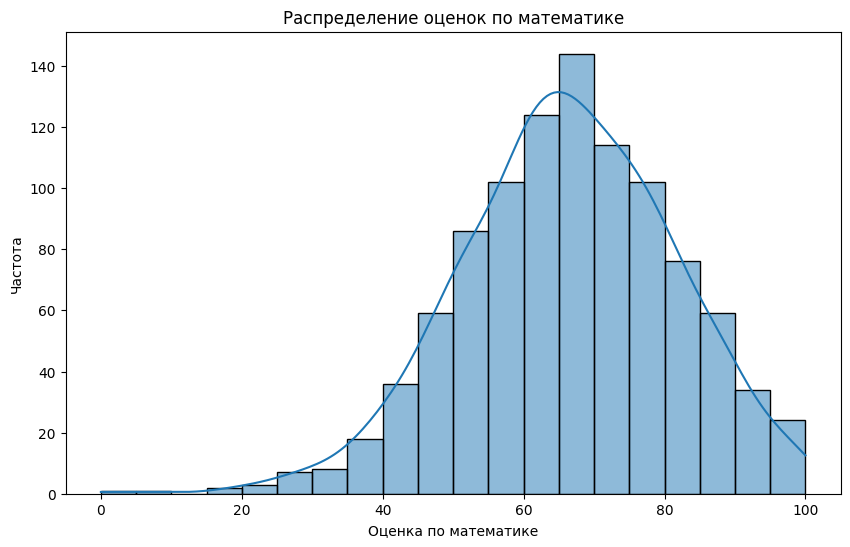

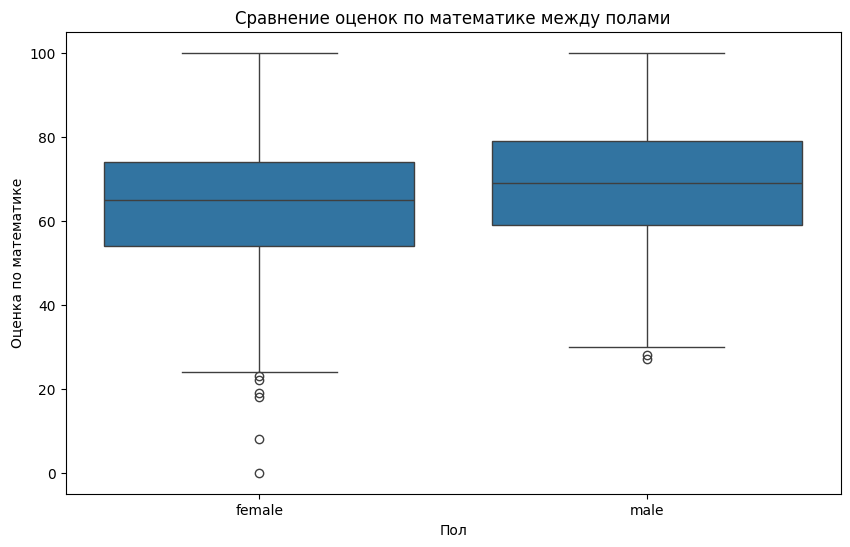

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Распределение оценок по математике')
plt.xlabel('Оценка по математике')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Сравнение оценок по математике между полами')
plt.xlabel('Пол')
plt.ylabel('Оценка по математике')
plt.show()


#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()
high_achieving_females = df[(df['gender'] == 'female') & 
                            (df['math score'] > 90) & 
                            (df['reading score'] > 90) & 
                            (df['writing score'] > 90)]

high_achieving_females_count = high_achieving_females.shape[0]
print("Число студенток, набравших больше 90 баллов по всем предметам:", high_achieving_females_count)


Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

gender_comparison = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])

print(gender_comparison)


       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

test_lunch_influence = df.groupby(['gender', 'test preparation course', 'lunch'])['Average Score'].agg(['mean'])

print(test_lunch_influence)


                                                  mean
gender test preparation course lunch                  
female completed               free/reduced  69.528571
                               standard      77.479532
       none                    free/reduced  59.501401
                               standard      70.961240
male   completed               free/reduced  65.721311
                               standard      73.513274
       none                    free/reduced  58.323810
                               standard      65.486043


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

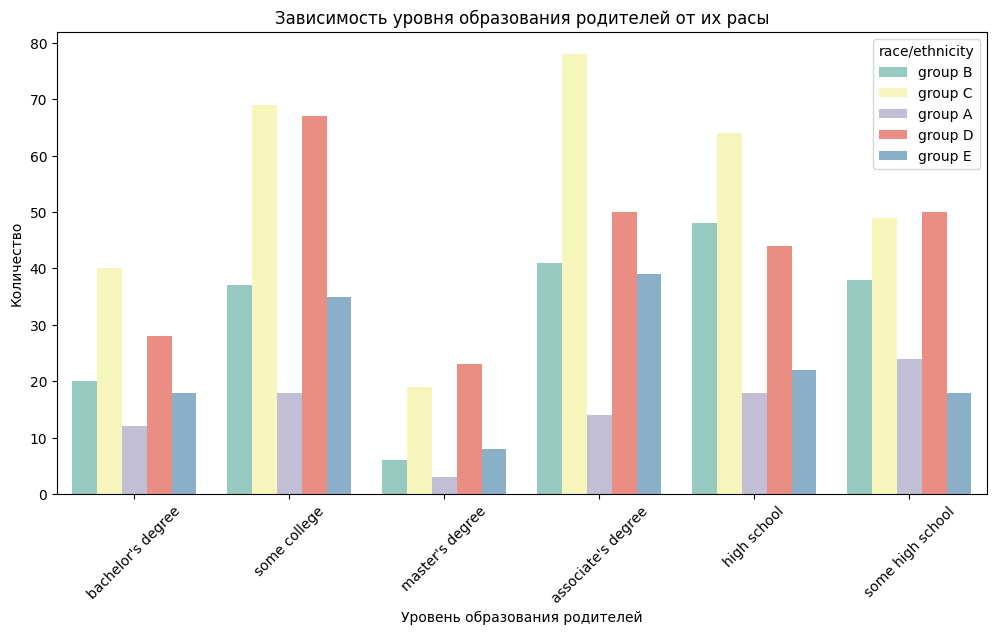

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity', palette='Set3')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

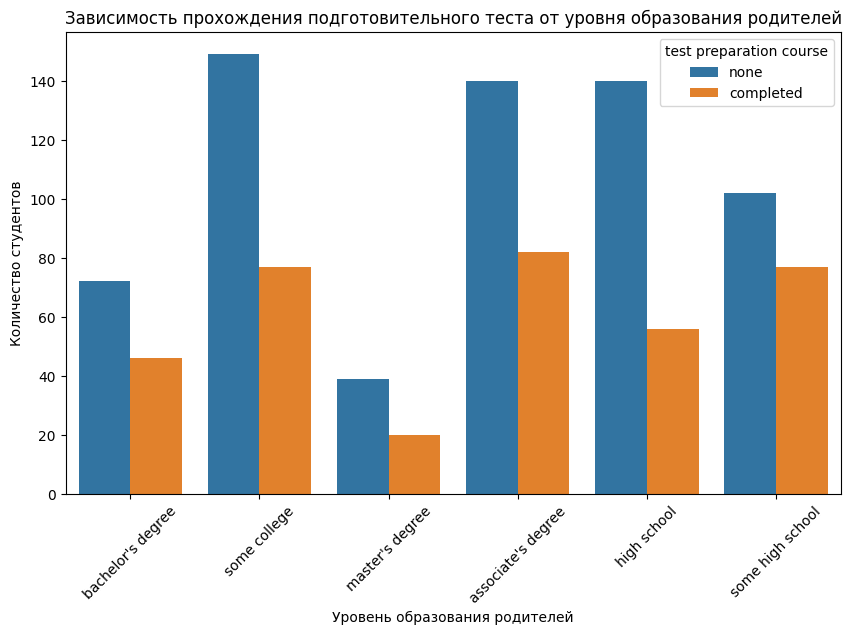

test preparation course      completed  none
parental level of education                 
associate's degree                  82   140
bachelor's degree                   46    72
high school                         56   140
master's degree                     20    39
some college                        77   149
some high school                    77   102


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')
plt.xticks(rotation=45)
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.show()

test_prep_by_education = df.groupby(['parental level of education', 'test preparation course']).size().unstack().fillna(0)
print(test_prep_by_education)


#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

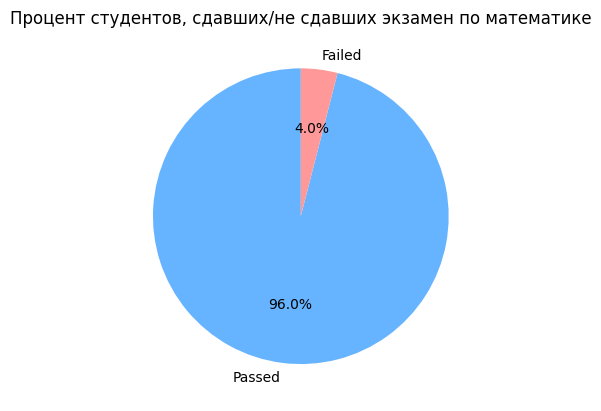

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

df['Math Result'] = df['math score'].apply(lambda x: 'Passed' if x >= 40 else 'Failed')

df['Math Result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Процент студентов, сдавших/не сдавших экзамен по математике')
plt.ylabel('')  
plt.show()


#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

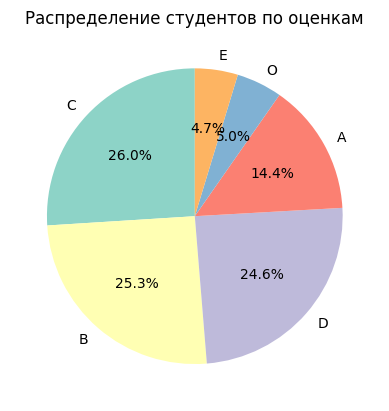

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def calculate_grade(row):
    if row['math score'] < 40:
        return 'E'  # Если студент не сдал математику, он получает "E"
    avg_score = row['Average Score']
    if avg_score <= 40:
        return 'E'
    elif avg_score <= 60:
        return 'D'
    elif avg_score <= 70:
        return 'C'
    elif avg_score <= 80:
        return 'B'
    elif avg_score <= 90:
        return 'A'
    else:
        return 'O'

df['Grade'] = df.apply(calculate_grade, axis=1)

df['Grade'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Распределение студентов по оценкам')
plt.ylabel('')  
plt.show()


#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

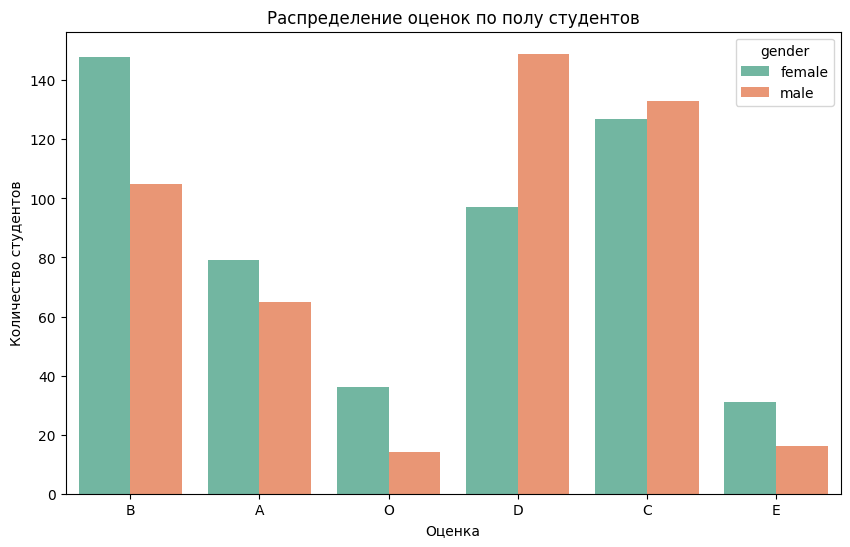

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def calculate_grade(row):
    if row['math score'] < 40:
        return 'E'  # Если студент не сдал математику, он получает "E"
    avg_score = row['Average Score']
    if avg_score <= 40:
        return 'E'
    elif avg_score <= 60:
        return 'D'
    elif avg_score <= 70:
        return 'C'
    elif avg_score <= 80:
        return 'B'
    elif avg_score <= 90:
        return 'A'
    else:
        return 'O'

df['Grade'] = df.apply(calculate_grade, axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade', hue='gender', palette='Set2')
plt.title('Распределение оценок по полу студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()
